In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import random
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor

#DATA CLEANING

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [5]:
def handle_non_numerical_data(df):
    columns = df.columns.values
    print(columns)

    for column in columns:
        text_digit_vals = {}
        def convert_to_int(val):
            return text_digit_vals[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_contents = df[column].values.tolist()
            unique_elements = set(column_contents)
            #print(column_contents)
            x = 0
            for unique in unique_elements:
                if unique not in text_digit_vals:
                    text_digit_vals[unique] = x
                    
                    x+=1
            print(text_digit_vals)
            df[column] = list(map(convert_to_int, df[column]))

    return df

df = handle_non_numerical_data(df)


['age' 'sex' 'bmi' 'children' 'smoker' 'region' 'charges']
{'female': 0, 'male': 1}
{'no': 0, 'yes': 1}
{'northeast': 0, 'southwest': 1, 'northwest': 2, 'southeast': 3}


In [6]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,3,1725.55230
2,28,1,33.000,3,0,3,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
5,31,0,25.740,0,0,3,3756.62160
6,46,0,33.440,1,0,3,8240.58960
7,37,0,27.740,3,0,2,7281.50560
8,37,1,29.830,2,0,0,6406.41070
9,60,0,25.840,0,0,2,28923.13692


In [7]:
df['age']=df.age.astype(float)
df['sex']=df.sex.astype(float)
df['children']=df.children.astype(float)
df['smoker']=df.smoker.astype(float)
df['region']=df.region.astype(float)
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,1.0,1.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,3.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,3.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,2.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,2.0,3866.85520


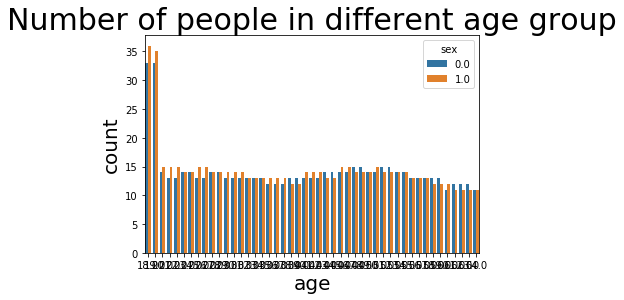

<Figure size 7200x7200 with 0 Axes>

In [8]:
b=sns.countplot('age',hue='sex',data=df)
b.axes.set_title('Number of people in different age group',fontsize=30)
b.set_xlabel("age",fontsize=20)
b.set_ylabel("count",fontsize=20)
plt.figure(figsize=(100,100))
plt.show()

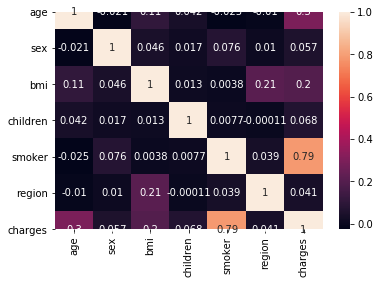

In [9]:
sns.heatmap(df.corr(),annot=True)

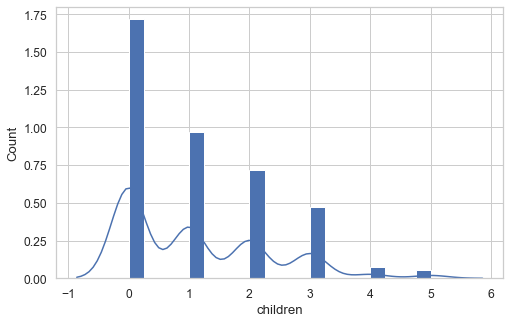

In [10]:
sns.set(style='whitegrid', palette="deep", font_scale=1.1, rc={"figure.figsize": [8, 5]})
sns.distplot(
    df['children'], norm_hist=False, kde=True, bins=20, hist_kws={"alpha": 1}
).set(xlabel='children', ylabel='Count');

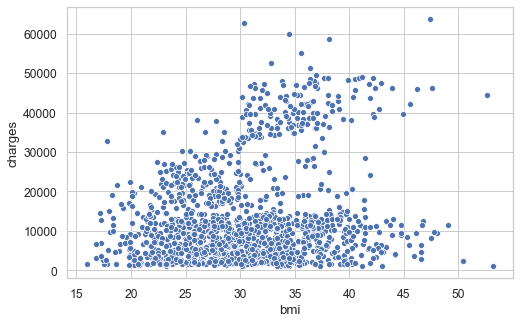

In [11]:
sns.scatterplot(x=df['bmi'], y=df['charges']);

<function matplotlib.pyplot.show(*args, **kw)>

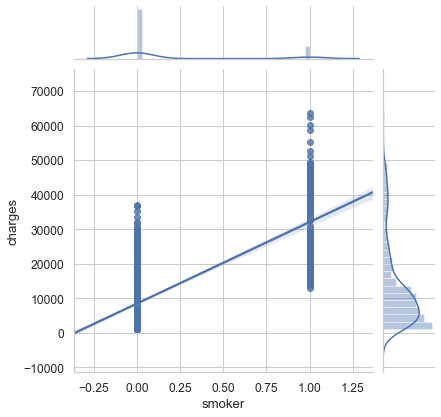

In [12]:
sns.jointplot(x=df['smoker'], y=df['charges'], kind='reg')
plt.show

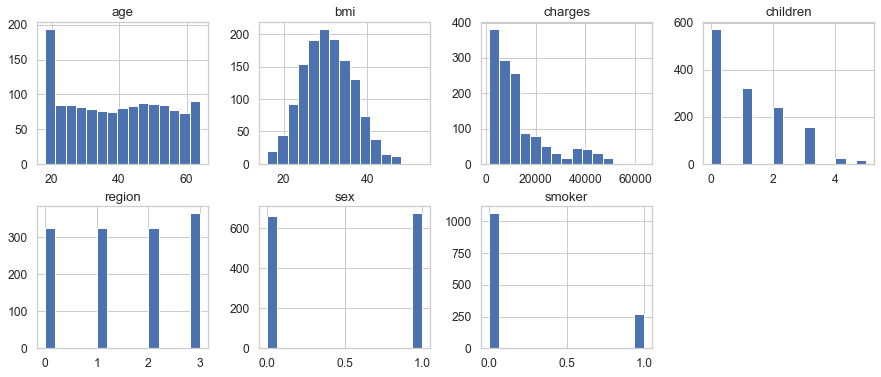

In [13]:
#analyzing numerical variables
numerical = [
  'age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'
]
df[numerical].hist(bins=15, figsize=(15, 6), layout=(2, 4));

0.6938826054814999


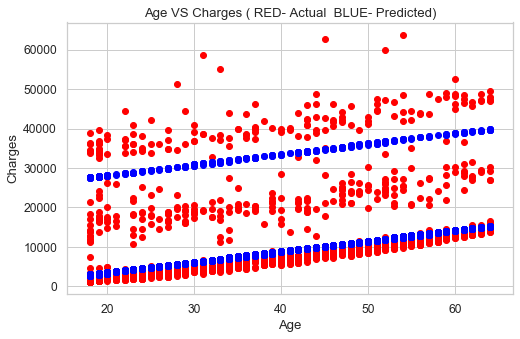

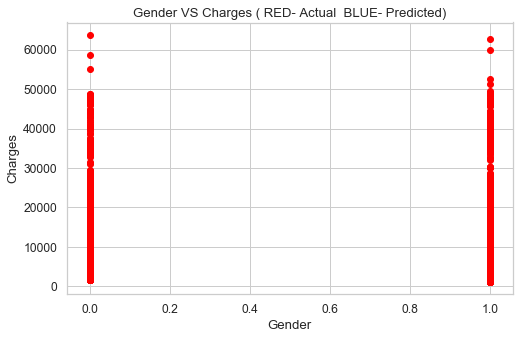

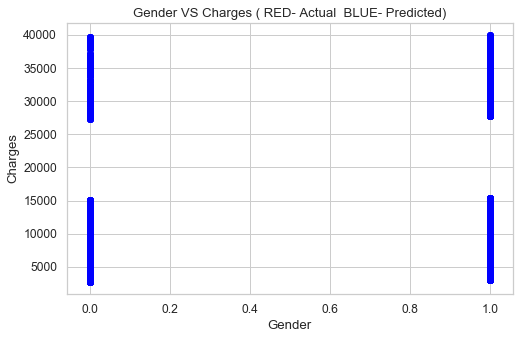

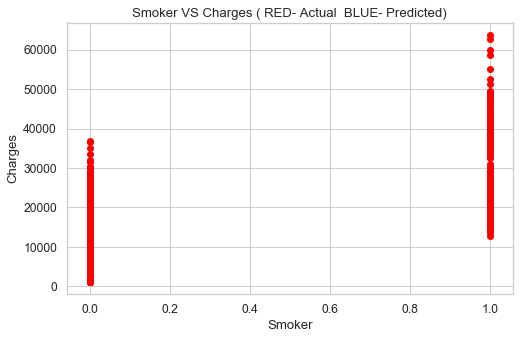

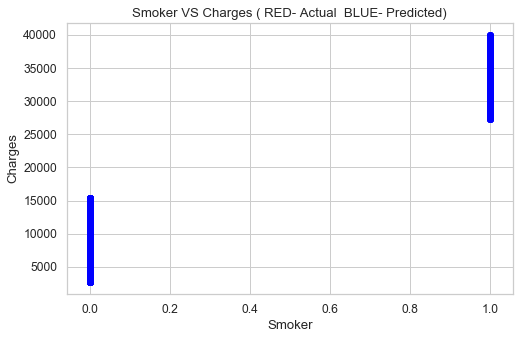

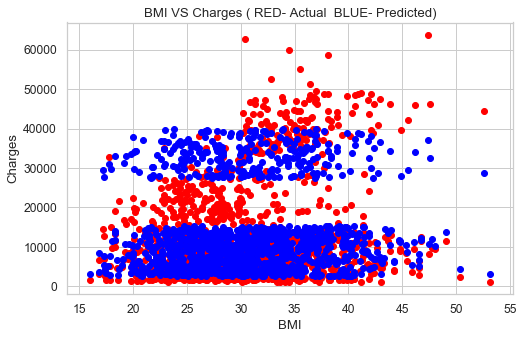

In [14]:
#MULTIPLE REGRESSION

X = df[['age','sex','smoker']]
Y = df['charges']

xTrain,xTest,yTrain,yTest=train_test_split(X,Y,test_size=1/3)
Regressor = LinearRegression()
Regressor.fit(xTrain,yTrain)
yPrediction=Regressor.predict(xTest)

#print('Intercept: \n', Regressor.intercept_)
#print('Coefficients: \n', Regressor.coef_)

accuracy=Regressor.score(xTest,yTest)
print(accuracy)


plt.scatter(df[['age']],df[['charges']],color='red')
plt.scatter(df[['age']],Regressor.predict(X),color='blue')
plt.title('Age VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


plt.scatter(df[['sex']],df[['charges']],color='red')
#plt.scatter(df[['sex']],Regressor.predict(X),color='blue')
plt.title('Gender VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

#plt.scatter(df[['sex']],df[['charges']],color='red')
plt.scatter(df[['sex']],Regressor.predict(X),color='blue')
plt.title('Gender VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

plt.scatter(df[['smoker']],df[['charges']],color='red')
#plt.scatter(df[['smoker']],Regressor.predict(X),color='blue')
plt.title('Smoker VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

#plt.scatter(df[['smoker']],df[['charges']],color='red')
plt.scatter(df[['smoker']],Regressor.predict(X),color='blue')
plt.title('Smoker VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

plt.scatter(df[['bmi']],df[['charges']],color='red')
plt.scatter(df[['bmi']],Regressor.predict(X),color='blue')
plt.title('BMI VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

0.6158614672036056


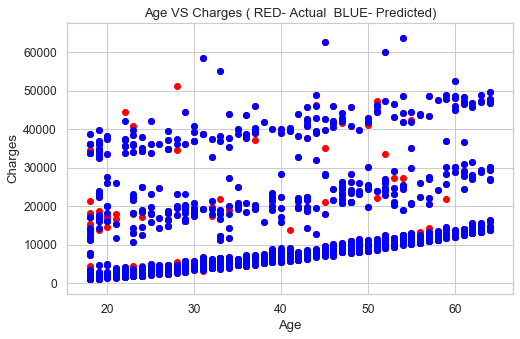

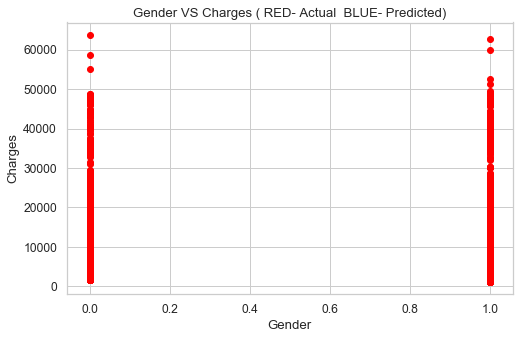

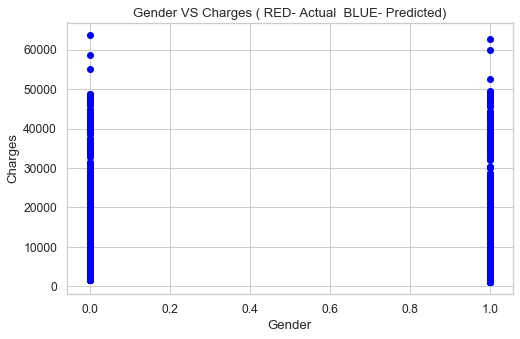

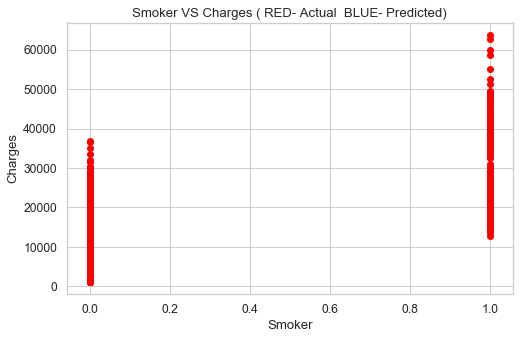

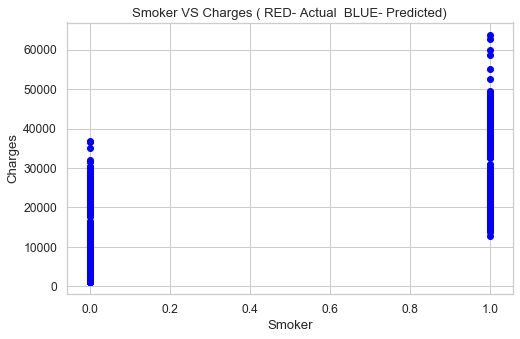

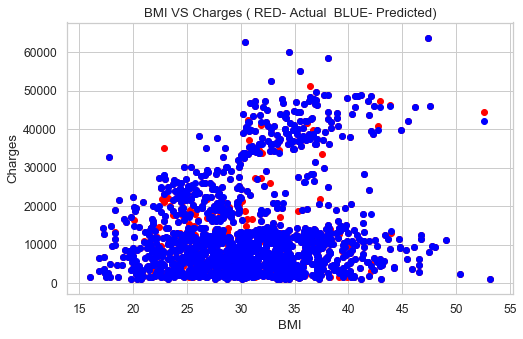

In [15]:
#DECISION TREE REGRESSION

A = df[['age','sex','smoker','bmi']]
B = df['charges']

xTrain,xTest,yTrain,yTest=train_test_split(A,B,test_size=1/10)
dtree = DecisionTreeRegressor(random_state=0)
dtree.fit(xTrain,yTrain)

confidence = dtree.score(xTest, yTest)
print(confidence)

plt.scatter(df[['age']],df[['charges']],color='red')
plt.scatter(df[['age']],dtree.predict(A),color='blue')
plt.title('Age VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


plt.scatter(df[['sex']],df[['charges']],color='red')
#plt.scatter(df[['sex']],Regressor.predict(X),color='blue')
plt.title('Gender VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

#plt.scatter(df[['sex']],df[['charges']],color='red')
plt.scatter(df[['sex']],dtree.predict(A),color='blue')
plt.title('Gender VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

plt.scatter(df[['smoker']],df[['charges']],color='red')
#plt.scatter(df[['smoker']],Regressor.predict(X),color='blue')
plt.title('Smoker VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

#plt.scatter(df[['smoker']],df[['charges']],color='red')
plt.scatter(df[['smoker']],dtree.predict(A),color='blue')
plt.title('Smoker VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

plt.scatter(df[['bmi']],df[['charges']],color='red')
plt.scatter(df[['bmi']],dtree.predict(A),color='blue')
plt.title('BMI VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()

0.932296324594602


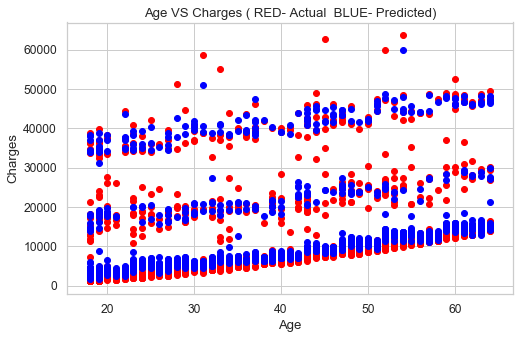

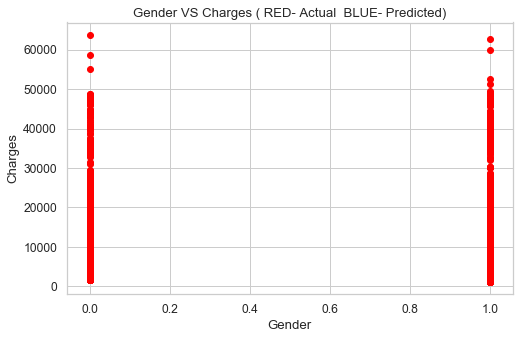

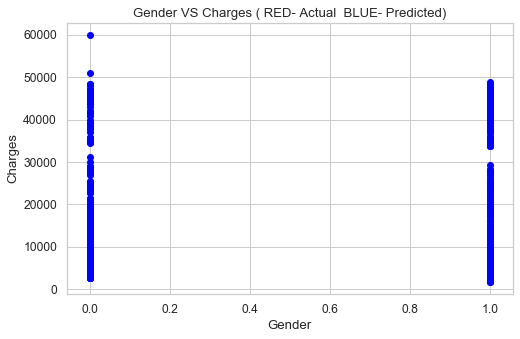

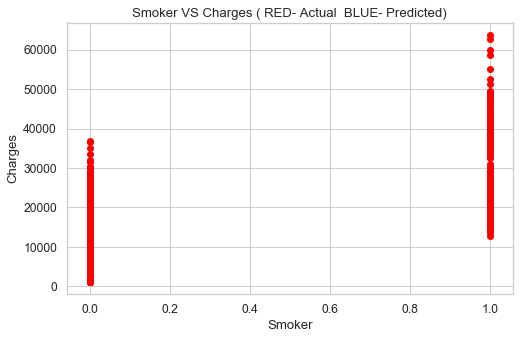

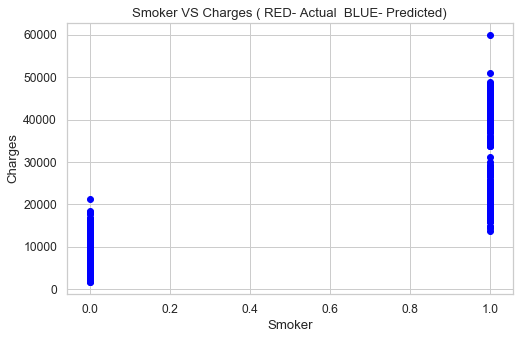

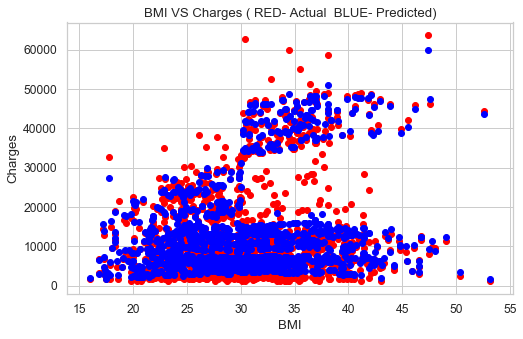

In [16]:
#Gradient Boosting Regressor
M=df[['age','sex','smoker','bmi']]
N = df['charges']

xTrain,xTest,yTrain,yTest=train_test_split(M,N,test_size=1/20)

est = GradientBoostingRegressor().fit(xTrain,yTrain)
confidence = est.score(xTest, yTest)
print(confidence)


plt.scatter(df[['age']],df[['charges']],color='red')
plt.scatter(df[['age']],est.predict(M),color='blue')
plt.title('Age VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Age")
plt.ylabel("Charges")
plt.show()


plt.scatter(df[['sex']],df[['charges']],color='red')
#plt.scatter(df[['sex']],Regressor.predict(X),color='blue')
plt.title('Gender VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

#plt.scatter(df[['sex']],df[['charges']],color='red')
plt.scatter(df[['sex']],est.predict(M),color='blue')
plt.title('Gender VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Gender")
plt.ylabel("Charges")
plt.show()

plt.scatter(df[['smoker']],df[['charges']],color='red')
#plt.scatter(df[['smoker']],Regressor.predict(X),color='blue')
plt.title('Smoker VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

#plt.scatter(df[['smoker']],df[['charges']],color='red')
plt.scatter(df[['smoker']],est.predict(M),color='blue')
plt.title('Smoker VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("Smoker")
plt.ylabel("Charges")
plt.show()

plt.scatter(df[['bmi']],df[['charges']],color='red')
plt.scatter(df[['bmi']],est.predict(M),color='blue')
plt.title('BMI VS Charges ( RED- Actual  BLUE- Predicted)')
plt.xlabel("BMI")
plt.ylabel("Charges")
plt.show()